In [1]:
import helpers
import numpy as np
from eigenface_enhanced import EnhancedEigenface
from eigenface_orig import Eigenface
from sklearn.model_selection import train_test_split

/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# N = 100

# # Load dataset
# images, labels = helpers.load_images_labels('../dataset/olivetti', N, N)

# # Split dataset
# # The dataset has 400 images, 10 images per person
# # We will use 7 images per person for training and 3 images per person for testing
# train_images = np.zeros((280, N, N))
# test_images = np.zeros((120, N, N))
# train_labels = np.zeros((280), dtype=int)
# test_labels = np.zeros((120), dtype=int)
# for i in range(40):
#     train_images[i*7:i*7+7] = images[i*10:i*10+7]
#     test_images[i*3:i*3+3] = images[i*10+7:i*10+10]
#     train_labels[i*7:i*7+7] = labels[i*10:i*10+7].astype(int)
#     test_labels[i*3:i*3+3] = labels[i*10+7:i*10+10].astype(int)

# # Check if the dataset is correctly split
# print(train_images.shape)
# print(test_images.shape)
# print(train_labels.shape)
# print(test_labels.shape)

Train (64, 100, 100) (64,)
Test (16, 100, 100) (16,)


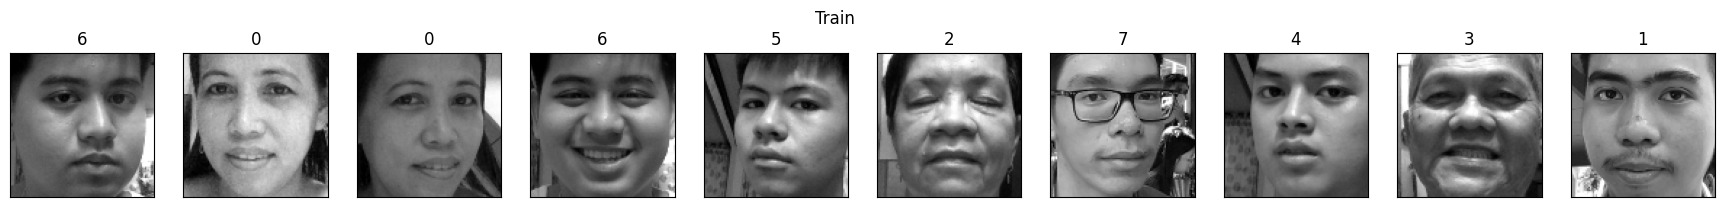

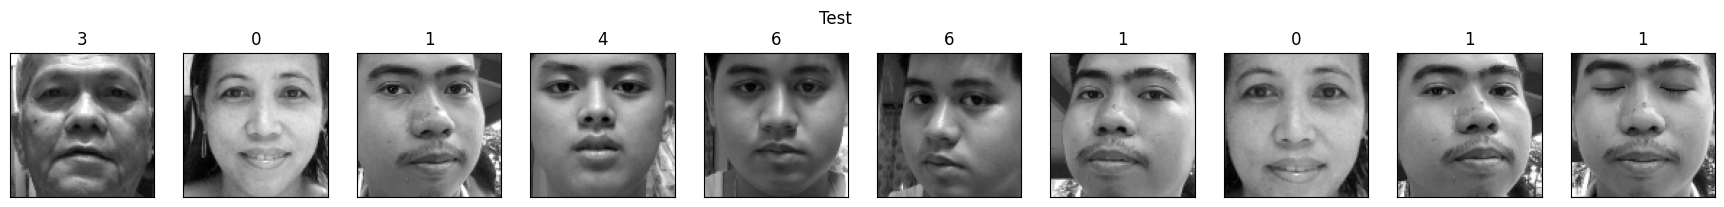

In [3]:
N = 100

# Load dataset
images, labels = helpers.load_images_labels('../dataset/faces', N, N)

# images = images[:100]
# labels = labels[:100]

# Split dataset
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# train_images, train_labels = helpers.load_images_labels('../dataset/o1-validation/train', N, N)
# test_images, test_labels = helpers.load_images_labels('../dataset/o1-validation/test', N, N)

print('Train', train_images.shape, train_labels.shape)
print('Test', test_images.shape, test_labels.shape)

helpers.plot_portraits(train_images[:10], train_labels[:10], N, N, 1, title="Train")
helpers.plot_portraits(test_images[:10], test_labels[:10], N, N, 1, title="Test")

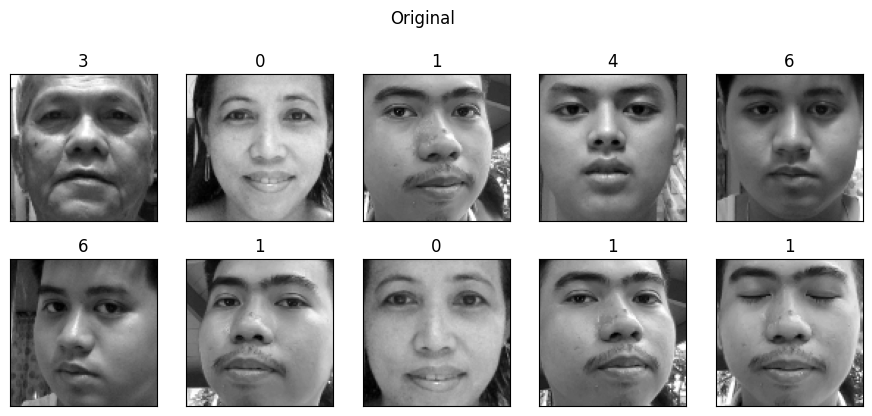

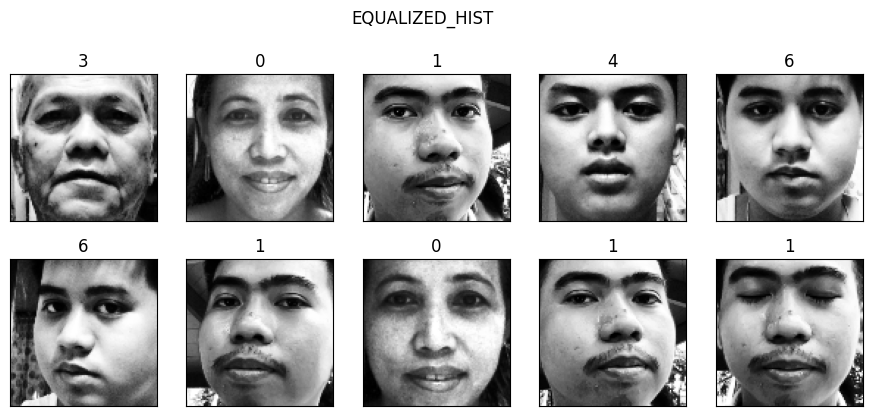

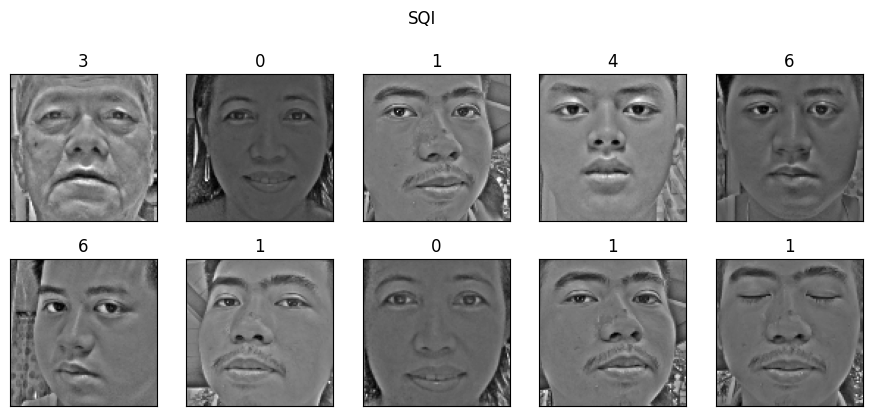

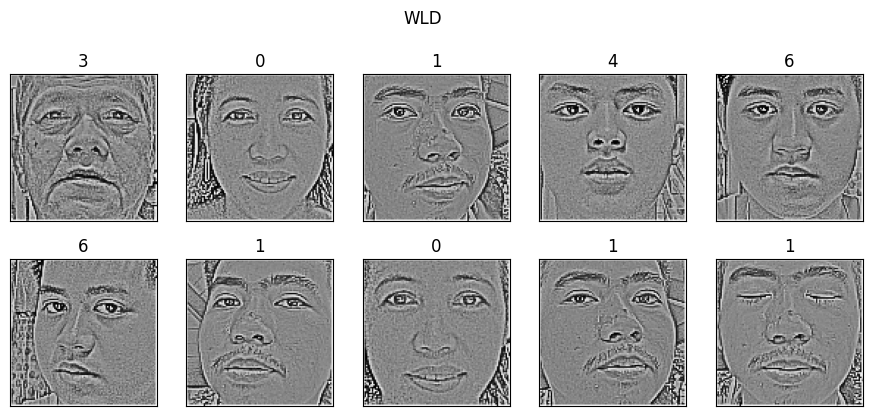

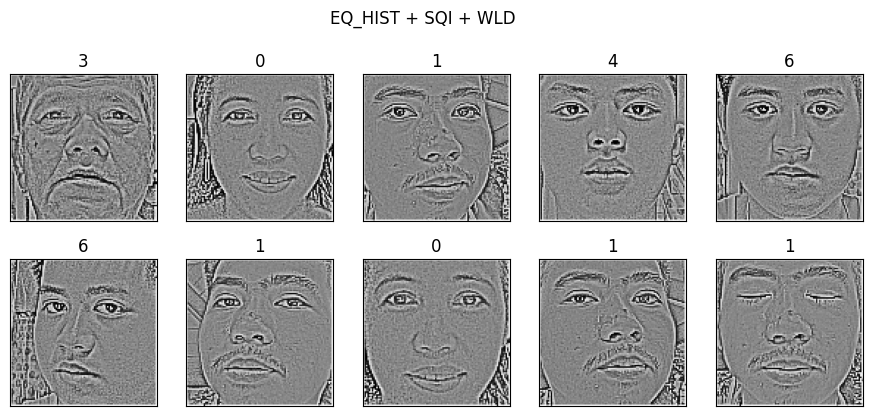

In [4]:
# sample = test_images[test_labels == 7]
# sample_labels = test_labels[test_labels == 7]
sample = test_images[:10]
sample_labels = test_labels[:10]
sample_equalize_hist = EnhancedEigenface.equalize_hist(sample)
sample_sqi = EnhancedEigenface.sqi(sample)
sample_wld = EnhancedEigenface.wld(sample)
sample_eq_hist_sqi_wld = EnhancedEigenface.eq_hist_sqi_wld(sample)

helpers.plot_portraits(sample, sample_labels, N, N, 2, 5, title='Original')
helpers.plot_portraits(sample_equalize_hist, sample_labels, N, N, 2, 5, title='EQUALIZED_HIST')
helpers.plot_portraits(sample_sqi, sample_labels, N, N, 2, 5, title='SQI')
helpers.plot_portraits(sample_wld, sample_labels, N, N, 2, 5, title='WLD')
helpers.plot_portraits(sample_eq_hist_sqi_wld, sample_labels, N, N, 2, 5, title='EQ_HIST + SQI + WLD')

In [5]:
print('Max and min values of a single weber image')
print('Max:', np.max(sample_eq_hist_sqi_wld[0]))
print('Min:', np.min(sample_eq_hist_sqi_wld[0]))

Max and min values of a single weber image
Max: 252
Min: 5


# Enhanced

In [6]:
M = int(len(train_labels) * 0.15)
print('M:', M)

enhanced_eigenface = EnhancedEigenface(train_images, train_labels, M)
enhanced_eigenface.fit()

M: 9
fit took 0.08744692802429199 seconds to run.


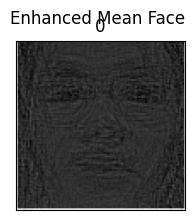

In [7]:
enhanced_mean_face = enhanced_eigenface._mean_face

helpers.plot_portraits([enhanced_mean_face], [0], N, N, 1, title='Enhanced Mean Face')

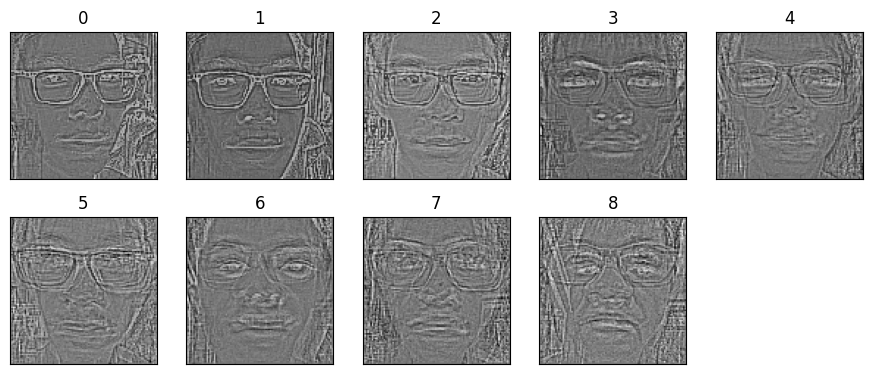

In [8]:
model_eigenfaces = enhanced_eigenface._eigenvectors

helpers.plot_portraits(model_eigenfaces[:M], [i for i in range(M)], N, N, c=5)

In [9]:
enhanced_eigenface.score(test_images, test_labels)

predict took 0.016350984573364258 seconds to run.


0.3125

# Original

In [10]:
M_ORIG = int(len(train_labels) * 0.15)
print('M:', M)

orig_eigenface = Eigenface(train_images, train_labels, M)
orig_eigenface.fit()

M: 9
fit took 4.216423273086548 seconds to run.


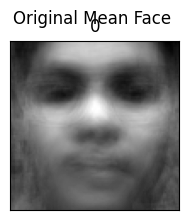

In [11]:
orig_mean_face = orig_eigenface._mean_face

helpers.plot_portraits([orig_mean_face], [0], N, N, 1, title='Original Mean Face')

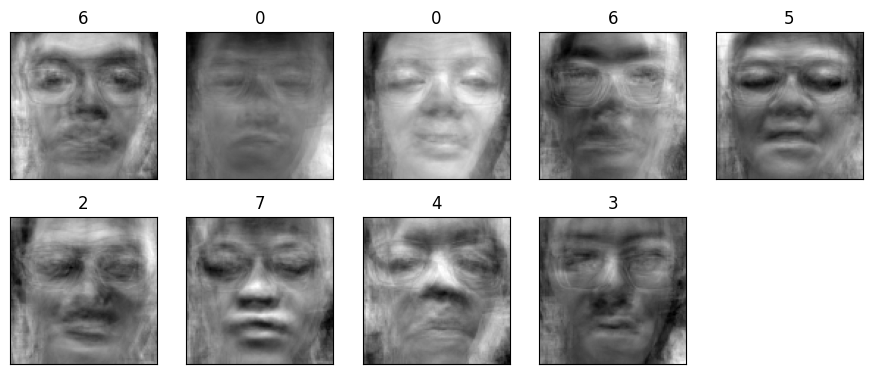

In [12]:
orig_model_eigenfaces = orig_eigenface._eigenvectors

helpers.plot_portraits(orig_model_eigenfaces[:M_ORIG], train_labels, N, N, c=5)

In [13]:
orig_eigenface.score(test_images, test_labels)

predict took 0.004075050354003906 seconds to run.


0.625

In [14]:
print('Max and min values of a single image')
print('Max:', np.max(enhanced_eigenface._X[0]))
print('Min:', np.min(enhanced_eigenface._X[0]))

Max and min values of a single image
Max: 255
Min: 0


# Cross validation using Stratified K-Folds

In [15]:
# from sklearn.model_selection import StratifiedKFold

# # Define the number of splits
# n_splits = 5
# skf = StratifiedKFold(n_splits=n_splits)

# # Initialize lists to store scores
# enhanced_scores = []
# orig_scores = []

# # Perform Stratified K-Folds cross-validation
# for train_index, test_index in skf.split(images, labels):
#     X_train, X_test = images[train_index], images[test_index]
#     y_train, y_test = labels[train_index], labels[test_index]
    
#     # Train and evaluate Enhanced Eigenface
#     enhanced_eigenface_cv = EnhancedEigenface(X_train, y_train, M)
#     enhanced_eigenface_cv.fit()
#     y_pred_enhanced = enhanced_eigenface_cv.predict(X_test)
#     enhanced_scores.append(enhanced_eigenface_cv.score(X_test, y_test))
    
#     # Train and evaluate Original Eigenface
#     orig_eigenface_cv = Eigenface(X_train, y_train, M_ORIG)
#     orig_eigenface_cv.fit()
#     y_pred_orig = orig_eigenface_cv.predict(X_test)
#     orig_scores.append(orig_eigenface_cv.score(X_test, y_test))

# # Print the average accuracy scores
# print()
# print(f'Enhanced Eigenface average accuracy: {np.mean(enhanced_scores):.2f}')
# print(f'Original Eigenface average accuracy: {np.mean(orig_scores):.2f}')

# Plot predictions

In [16]:
orig_predicted_labels, _, _ = orig_eigenface.predict(test_images)
enhanced_predicted_labels, _, _ = enhanced_eigenface.predict(test_images)

predict took 0.005555391311645508 seconds to run.
predict took 0.032011985778808594 seconds to run.


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         1
           6       0.75      0.60      0.67         5

    accuracy                           0.62        16
   macro avg       0.65      0.68      0.63        16
weighted avg       0.69      0.62      0.62        16

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         2
           3       0.33      0.17      0.22         6
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       0.50      0.33      0.40         6

    accuracy                           0.31        16
   macro avg       0.39

/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control

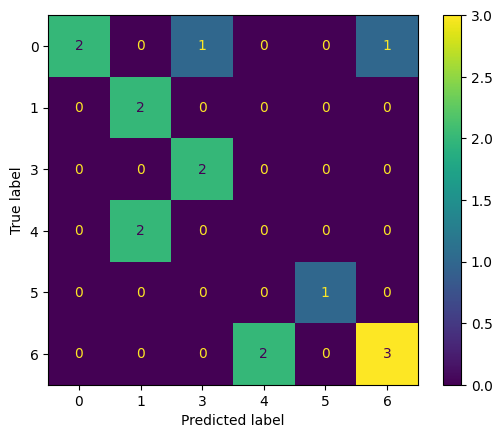

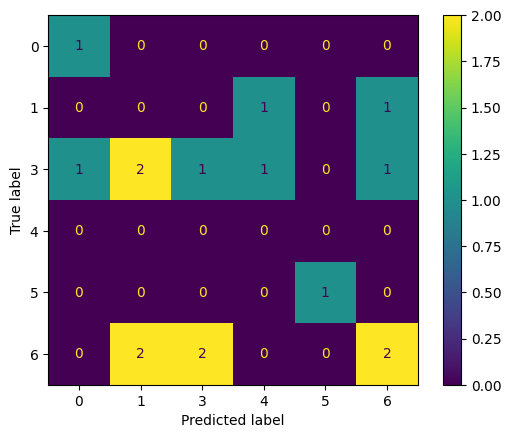

In [17]:
# Original
helpers.confusion_matrix(orig_predicted_labels, test_labels)
# Enhanced
helpers.confusion_matrix(enhanced_predicted_labels, test_labels)

# Plot weights

In [18]:
orig_weights = orig_eigenface._X_weights
enhanced_weights = enhanced_eigenface._X_weights

In [19]:
helpers.plot_umap_3d_with_filter("Original Eigenface", orig_weights, train_labels)
helpers.plot_umap_3d_with_filter("Enhanced Eigenface", enhanced_weights, train_labels)

/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/.venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/Users/amyrfrancisco/Developer/projects/enhanced-eigenface/.venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

